In [1]:
#import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
# reading the 512 x 512 image
img = cv2.imread('lena_gray_512.tif',0)

In [3]:
plt.imshow(img, cmap='gray')

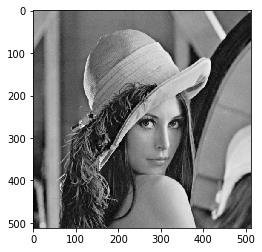

In [4]:
#display the image
plt.show()

In [5]:
#image matrix
print(img,img.shape)

[[162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 ..., 
 [ 43  43  50 ..., 104 100  98]
 [ 44  44  55 ..., 104 105 108]
 [ 44  44  55 ..., 104 105 108]] (512, 512)


In [6]:
#initializing downgraded image
img256 = np.zeros((256,256))

In [7]:
#downgrading 512x512 image
for i in range(256):
    for j in range(256):
        img256[i][j] = int(img[2*i][2*j])

In [8]:
# downgraded image matrix
print(img256,img256.shape)

[[ 162.  162.  162. ...,  168.  171.  155.]
 [ 162.  162.  162. ...,  168.  171.  155.]
 [ 162.  162.  162. ...,  168.  171.  155.]
 ..., 
 [  48.   57.   54. ...,   75.   97.   88.]
 [  46.   50.   52. ...,   89.  100.   98.]
 [  44.   55.   54. ...,   97.  100.  105.]] (256, 256)


In [9]:
#creating x and y matrices
xt = []
yt = []
for i in range(1,255):
    for j in range(1,255):
        yt.append(img256[i][j])
        if (i+j)%2==0 :
            xt.append([img256[i-1][j-1],img256[i-1][j+1],img256[i+1][j-1],img256[i+1][j+1]])
        else :
            xt.append([img256[i][j-1],img256[i][j+1],img256[i+1][j],img256[i-1][j]])

In [10]:
x = np.array(xt)
y = np.array(yt)

In [26]:
#x, y matrices
print(x,y)
print(x.shape, y.shape)

[[ 162.  162.  162.  162.]
 [ 162.  163.  162.  162.]
 [ 162.  165.  162.  165.]
 ..., 
 [  67.   75.   76.   97.]
 [  75.  100.   97.   75.]
 [  75.   88.   97.  105.]] [ 162.  162.  163. ...,   75.   89.  100.]
(64516, 4) (64516,)


In [12]:
# calculating parameters
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.transpose(x)),y)

In [13]:
#parameters
print(b,b.shape)

[ 0.1675933   0.22167926  0.34516929  0.26755086] (4,)


In [14]:
# initializing image to be predicted
img512 = np.zeros((512,512))
for i in range(256):
    for j in range(256):
        img512[2*i][2*j] = img256[i][j]

In [15]:
print(img512)

[[ 162.    0.  162. ...,    0.  155.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [ 162.    0.  162. ...,    0.  155.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [  44.    0.   55. ...,    0.  105.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]]


In [16]:
for i in range(1,510,2):
    for j in range(1,510,2):
        img512[i][j] = np.matmul([img512[i-1][j-1],img512[i-1][j+1],img512[i+1][j-1],img512[i+1][j+1]],b)

for i in range(1,511,2):
    img512[i][511] = (img512[i-1][510] + img512[i+1][510])/2

for i in range(1,511,2):
    img512[511][i] = (img512[510][i-1] + img512[510][i+1])/2
    
img512[511][511] = img[510][510]

In [17]:
print(img512)

[[ 162.            0.          162.         ...,    0.          155.            0.        ]
 [   0.          162.32281828    0.         ...,  163.51307072    0.          155.        ]
 [ 162.            0.          162.         ...,    0.          155.            0.        ]
 ..., 
 [   0.           48.69600065    0.         ...,  101.09366632    0.          101.5       ]
 [  44.            0.           55.         ...,    0.          105.            0.        ]
 [   0.           49.5           0.         ...,  102.5           0.          105.        ]]


In [18]:
for i in range(1,510,2):
    for j in range(2,511,2):
        img512[i][j] = np.matmul([img512[i][j-1],img512[i][j+1],img512[i-1][j],img512[i+1][j]],b)

for i in range(2,511,2):
    for j in range(1,510,2):
        img512[i][j] = np.matmul([img512[i][j-1],img512[i][j+1],img512[i-1][j],img512[i+1][j]],b)

for i in range(2,511,2):
    img512[i][511] = (img512[i-1][510] + img512[i+1][510])/2

for i in range(1,511,2):
    img512[0][i] = (img512[1][i-1] + img512[1][i+1])/2
    
for i in range(1,510,2):
    img512[i][0] = (img512[i-1][1] + img512[i+1][1])/2
    
for i in range(2,511,2):
    img512[511][i] = (img512[510][i-1] + img512[510][i+1])/2
    
img512[0][511] = img512[1][510]
img512[511][0] = img512[510][1]

In [19]:
#predicted image
print(img512)

[[ 162.           81.22424129  162.         ...,  163.10797989  155.
   156.73560295]
 [ 121.87242842  162.32281828  162.44848258 ...,  163.51307072
   156.73560295  155.        ]
 [ 162.          162.52061554  162.         ...,  163.20649207  155.
   156.73560295]
 ..., 
 [  49.33835871   48.69600065   51.95904474 ...,  101.09366632  101.3624963
   101.5       ]
 [  44.           49.61859582   55.         ...,  102.35404401  105.
    50.68124815]
 [  49.61859582   49.5          51.89971441 ...,  102.5          76.51764608
   105.        ]]


In [20]:
im = img512.astype(int)

In [21]:
plt.imshow(im, cmap='gray')

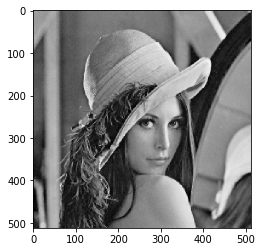

In [22]:
#displaying predicted image
plt.show()

In [23]:
mse = np.sum(np.square(np.subtract(img,im)))/(512*512)
print(mse)

32.1458854675


In [24]:
psnr = 10 * math.log10((65025)/mse)

In [25]:
#PSNR
print(psnr)

33.05954967841002
